In [37]:
import io, os, sys, types
from IPython import get_ipython
from Utils import NotebookFinder
import pandas as pd
from Attack_RF import attack_RF
from config_fileRF import config
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt  
import numpy as np
import warnings


In [38]:
n_splits_k = 2 #config["RF"]["n_splits_k"]

In [39]:
n_splits_k

2

In [40]:
def run_main():
    # Ignore warning messages. The warning message is mainly warning the labels 
    #contained in the training set. When testing the data, some labels did not appear.
    warnings.filterwarnings("ignore")
    # The data currently used is entirely the attack data in the original dataset, 
    # not the output data of the CNN
    datasets = pd.read_csv("data/attack_RF.csv") 
    features = datasets.iloc[:,:-1]
    labels =  datasets.iloc[:,-1]
    # Currently, the maximum value of n_splits_k is only 11 because the Heartbleed class has only 11 samples.
    n_splits_k = [2,3,4,5,6,7,8,9,10,11]
    # accuracy_split saves the average accuracy of each fold
    accuracy_split = []   
    for splits_k in n_splits_k:
        skf = StratifiedKFold(n_splits=splits_k,random_state = 2)
        # The accracy_of_classes list holds the accuracy of each compromise
        accracy_of_classes = []
        # The precision_of_classes list holds the precision of each class in each compromise test set
        precision_of_classes = []
        # The recall_of_classes list holds the recall value of each class in each compromise test set
        recall_of_classes = []
        # The f1_of_classes list holds the f1 value of each class in each compromise test set
        f1_of_classes = []
        # flag is used to mark whether to output the training set and test set size，
        # flag = 0 means no output, flag = 1 means output
        flag = 0 
        print("n_splits_k value is:",splits_k)
        for train_index, test_index in skf.split(features,labels):  
            # The following is the training and test set segmentation process
            features_train = features.iloc[train_index]
            features_test =  features.iloc[test_index]
            labels_train = labels.iloc[train_index]
            labels_test =  labels.iloc[test_index]
            features_train = features_train.values
            labels_train = labels_train.values
            features_test = features_test.values
            labels_test = labels_test.values
            labels_train = labels_train.reshape(len(labels_train))
            labels_test = labels_test.reshape(len(labels_test))
            if flag==0:
                print("Number of examples in the train set:",labels_train.shape)
                print("Number of examples in the test set:",labels_test.shape)
                flag = 1
            # attack_RF returns the accuracy of each test set and the precision, recall, and f1 values of each class 
            accuracy,precision,recall,f1 = attack_RF(features_train,labels_train,features_test,labels_test)
            precision_of_classes.append(precision)
            recall_of_classes.append(recall)
            f1_of_classes.append(f1)
            accracy_of_classes.append(accuracy)
        # Find the average of all the precisions in all prediction sets in each compromise
        precision_mean=np.mean(precision_of_classes,axis=0)
        # Find the average of all the recall value in all prediction sets in each compromise
        recall_mean = np.mean( recall_of_classes,axis=0)
        # Find the average of all the f1 value in all prediction sets in each compromise
        f1_mean = np.mean(f1_of_classes,axis=0)
        acc_avg = np.mean(accracy_of_classes)
        accuracy_split.append(acc_avg)
        print("accuracy_mean value is :",acc_avg)
        # Visualize the precision average, recall average, and f1 average of all classes in each compromise.
        plt.figure()
        x = range(1,len(precision)+1)
        y1 = precision_mean
        y2 = recall_mean
        y3 = f1_mean
        pre = plt.plot(x,y1,label = "precision")
        rec = plt.plot(x,y2,label = "recall")
        f1_ = plt.plot(x,y3,label = "f1") 
        plt.ylabel('accuracy_split')
        plt.xlabel('n_splits_k')
        plt.legend(['precision','recall','f1'])
        plt.show()
    # As the number of cross-validation folds increases, accuracy is worth changing    
    plt.figure()
    plt.plot(n_splits_k,accuracy_split)
    plt.ylabel('accuracy_split')
    plt.xlabel('n_splits_k')
    plt.show()

n_splits_k value is: 2
Number of examples in the train set: (278267,)
Number of examples in the test set: (278274,)
accuracy_mean value is : 0.8869072987193087


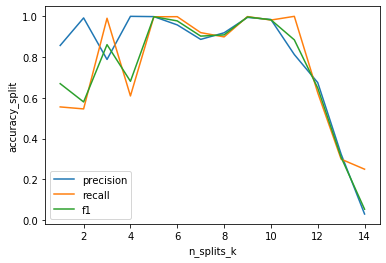

n_splits_k value is: 3
Number of examples in the train set: (371024,)
Number of examples in the test set: (185517,)
accuracy_mean value is : 0.9914364324024891


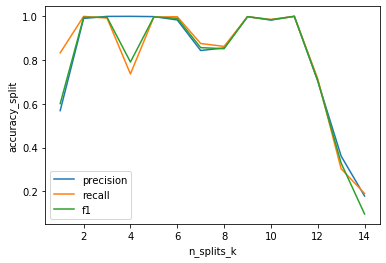

n_splits_k value is: 4
Number of examples in the train set: (417403,)
Number of examples in the test set: (139138,)
accuracy_mean value is : 0.9896881772573881


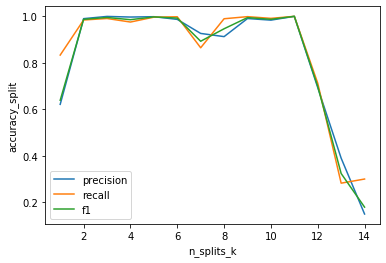

n_splits_k value is: 5
Number of examples in the train set: (445225,)
Number of examples in the test set: (111316,)
accuracy_mean value is : 0.992024154993644


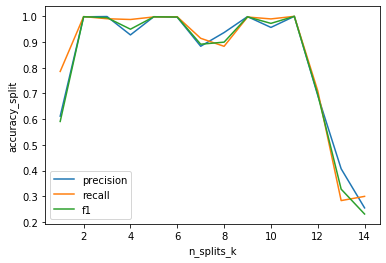

n_splits_k value is: 6
Number of examples in the train set: (463779,)
Number of examples in the test set: (92762,)
accuracy_mean value is : 0.9925181618690099


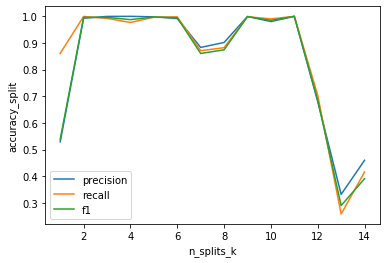

n_splits_k value is: 7
Number of examples in the train set: (477028,)
Number of examples in the test set: (79513,)
accuracy_mean value is : 0.9928920096181978


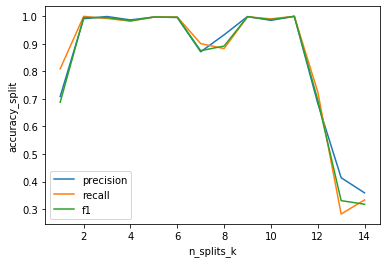

n_splits_k value is: 8
Number of examples in the train set: (486967,)
Number of examples in the test set: (69574,)
accuracy_mean value is : 0.9930949832627731


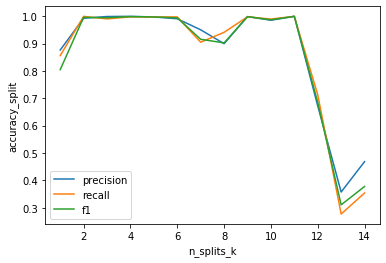

n_splits_k value is: 9
Number of examples in the train set: (494698,)
Number of examples in the test set: (61843,)
accuracy_mean value is : 0.9934399897320321


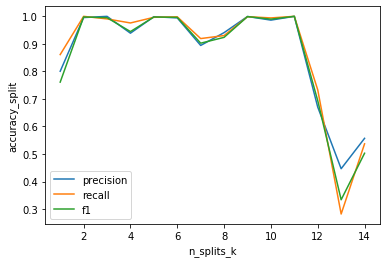

n_splits_k value is: 10
Number of examples in the train set: (500879,)
Number of examples in the test set: (55662,)
accuracy_mean value is : 0.995012201454483


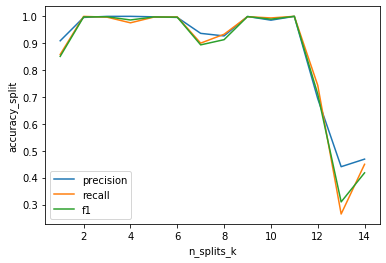

n_splits_k value is: 11
Number of examples in the train set: (505941,)
Number of examples in the test set: (50600,)
accuracy_mean value is : 0.9932172712051888


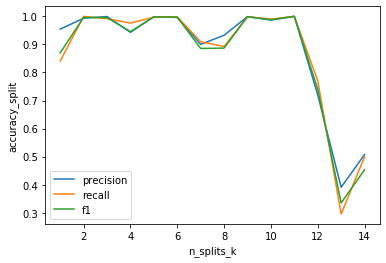

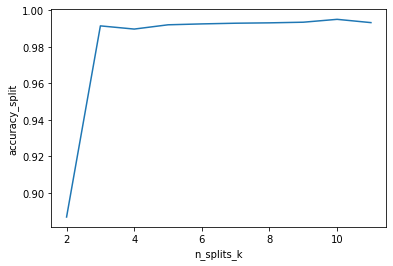

In [42]:
if __name__=="__main__":
    run_main()